**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [52]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors):
        if n_neighbors <= 0:
            raise ValueError(
                "n_neighbors should be > 0, got {0}".format(n_neighbors))
        self.n_neighbors = n_neighbors
        self.X = None
        self.y = None
        self.classes = None

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.classes = np.unique(y).astype(np.int, copy=False)
        return self

    def get_nearest_neighbors(self, X):
        if self.X.shape[0] < self.n_neighbors:
            raise ValueError("Salmples size should be >= n_neighbors, but got \
             {0} < {1}".format(
                X.shape[0], self.n_neighbors))
        # KNeighborsClassifier uses minkowski's distance
        # with p = 2 => euclidean's distance
        distances = np.apply_along_axis(lambda x: np.linalg.norm(
            self.X - x, axis=1), 1, X.astype(np.double, copy=False))
        # Get nearest neighbors
        nearest_indexes = np.argsort(distances)[:, :self.n_neighbors]
        return self.y[nearest_indexes]

    def predict(self, X):
        # Get the most common label
        bin_counts = np.apply_along_axis(
            lambda x: np.bincount(x).argmax(),
            1, self.get_nearest_neighbors(X).astype(np.int, copy=False))
        return bin_counts

    def predict_proba(self, X):
        predictions = np.zeros((X.shape[0], self.classes.size))
        neighbors = self.get_nearest_neighbors(X)
        # Find all occurences of class
        for class_ in self.classes:
            predictions[:, class_] = np.sum(class_ == neighbors, axis=1)
        # Normalize output
        predictions /= self.n_neighbors
        return predictions

    def score(self, X, y):
        return (y == self.predict(X)).mean()

**IRIS**

In [53]:
iris = datasets.load_iris()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [55]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [56]:
%time clf.fit(X_train, y_train)

CPU times: user 1.5 ms, sys: 1.21 ms, total: 2.71 ms
Wall time: 1.51 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [57]:
%time my_clf.fit(X_train, y_train)

CPU times: user 370 µs, sys: 247 µs, total: 617 µs
Wall time: 420 µs


MyKNeighborsClassifier(n_neighbors=2)

In [58]:
%time clf.predict(X_test)

CPU times: user 1.59 ms, sys: 842 µs, total: 2.44 ms
Wall time: 1.57 ms


array([0, 1, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0])

In [59]:
%time my_clf.predict(X_test)

CPU times: user 2.48 ms, sys: 1.63 ms, total: 4.11 ms
Wall time: 3.03 ms


array([0, 1, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0])

In [60]:
%time clf.predict_proba(X_test)

CPU times: user 1.24 ms, sys: 1.09 ms, total: 2.32 ms
Wall time: 1.47 ms


array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [61]:
%time my_clf.predict_proba(X_test)

CPU times: user 2.22 ms, sys: 1.23 ms, total: 3.45 ms
Wall time: 2.52 ms


array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [62]:
clf.score(X_test, y_test)

1.0

In [63]:
my_clf.score(X_test, y_test)

1.0

Best test score 1.0 with 1 numbers of neighbors


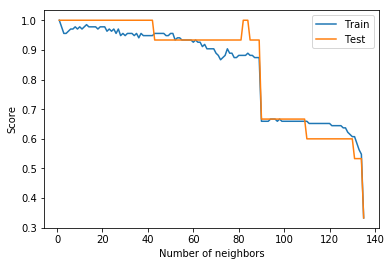

In [64]:
# Задание 3
train_scores = []
test_scores = []
n_neighbors = range(1, X_train.shape[0]+1)
best_score = -1
best_n_neighbors = 0
for num_of_neighbors in n_neighbors:
    clf = MyKNeighborsClassifier(n_neighbors=num_of_neighbors)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_score = clf.score(X_test, y_test)
    if test_score > best_score:
        best_score = test_score
        best_n_neighbors = num_of_neighbors
    test_scores.append(test_score)
print("Best test score {0} with {1} numbers of neighbors".format(best_score, best_n_neighbors))
plt.xlabel("Number of neighbors")
plt.ylabel("Score")
plt.plot(n_neighbors, train_scores, label="Train")
plt.plot(n_neighbors, test_scores, label="Test")
plt.legend()

**MNIST**

In [65]:
mnist = fetch_mldata('MNIST original')

In [67]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [68]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [69]:
%time clf.fit(X_train, y_train)

CPU times: user 1min 28s, sys: 2.24 s, total: 1min 31s
Wall time: 1min 33s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [70]:
%time my_clf.fit(X_train, y_train)

CPU times: user 4.22 ms, sys: 3.12 ms, total: 7.35 ms
Wall time: 10.3 ms


MyKNeighborsClassifier(n_neighbors=2)

In [71]:
%time clf.predict(X_test)

CPU times: user 7.72 s, sys: 83.3 ms, total: 7.8 s
Wall time: 7.89 s


array([3., 0., 2., 4., 8., 8., 9., 2., 1., 7., 9., 4., 3., 0., 1., 0., 7.,
       4., 9., 6., 1., 2., 2., 4., 9., 7., 2., 3., 5., 4., 3., 8., 9., 1.,
       1., 8., 1., 4., 5., 8., 6., 0., 6., 0., 6., 7., 9., 8., 6., 0., 6.,
       5., 4., 3., 5., 7., 7., 4., 0., 1., 2., 5., 8., 1., 6., 3., 5., 7.,
       3., 2.])

In [72]:
%time my_clf.predict(X_test)

CPU times: user 33.2 s, sys: 35.9 s, total: 1min 9s
Wall time: 1min 12s


array([3, 0, 2, 4, 8, 8, 9, 2, 1, 7, 9, 4, 3, 0, 1, 0, 7, 4, 9, 6, 1, 2,
       2, 4, 9, 7, 2, 3, 5, 4, 3, 8, 9, 1, 1, 8, 1, 4, 5, 8, 6, 0, 6, 0,
       6, 7, 9, 8, 6, 0, 6, 5, 4, 3, 5, 7, 7, 4, 0, 1, 2, 5, 8, 1, 6, 3,
       5, 7, 3, 2])

In [73]:
%time clf.predict_proba(X_test)

CPU times: user 7.64 s, sys: 548 ms, total: 8.19 s
Wall time: 8.29 s


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 

In [74]:
%time my_clf.predict_proba(X_test)

CPU times: user 32.8 s, sys: 33.4 s, total: 1min 6s
Wall time: 1min 8s


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 

In [75]:
clf.score(X_test, y_test)

0.9857142857142858

In [76]:
my_clf.score(X_test, y_test)

0.9857142857142858

Задание 5

## seaborn 
Библиотека-обертка над matplotlib'ом, которая упрощает построения сложных графиков
## matplotlib 
Основная библиотека для построения графики в python. 
## train_test_split
Функция, которая разбивает выборку на две части: тренировочную(для обучения алгоритма) и тестов(для проверки качетсва его работы)
## Pipeline (from sklearn.pipeline import Pipeline)
Позволяет задать определенную последовательность трансформаций над данными (e.g StandartScaler->SelectKBest->SVM) 
## StandardScaler (from sklearn.preprocessing import StandardScaler)
Приведение признаков выборки к нормальному распределению(mean=0, std=1) 
## ClassifierMixin
Класс-примесь для всех классификаторов в sklearn. Задает метод score(возвращает среднее значение ошибки) 
## NeighborsBase
Базовый класс для всех алгоритмов вида "ближайших соседей"
## KNeighborsMixin
Примесь для функционала поиска ближайших соседей. Задает методы kneighbors(возвращает координаты ближайших соседей точки) и kneighbors_graph(возвращает взвешенный граф ближайших соседей точки)
## SupervisedIntegerMixin
Примесь для функционала обучения с учителем. Задает метод fit(обучение модели на размеченных, т.е с ответами, данными)